In [1]:
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
from tqdm import tqdm

# Add the project root to sys.path
project_root = os.path.abspath(os.path.join(os.getcwd(), "../.."))
sys.path.append(project_root)

import dagology as dag
from plot_utils import plot_power_law_fit, propagate_relative_error

np.random.seed(42)

In [2]:
%matplotlib inline

In [3]:
D = 2

n_iter = 50
n_range = np.logspace(1.1, 3.1, 50).astype(int)
shape = (len(n_range), n_iter)

greedy_forward_path_weights_iter = np.zeros(shape)
greedy_backward_path_weights_iter = np.zeros(shape)
greedy_forward_num_edges_iter = np.zeros(shape)
greedy_backward_num_edges_iter = np.zeros(shape)

for idx, n in enumerate(tqdm(n_range)):
    for i in range(n_iter):
        DAG = dag.CausalSetGraph()
        R = dag.minkowski_interval(n, D)
        G = DAG.generate_graph(R, weighted=True)
        greedy_forward = DAG.traverse_path(dag.greedy_shortest_path, 'forward')
        greedy_backward = DAG.traverse_path(dag.greedy_shortest_path, 'backward')
        greedy_forward_path_weights_iter[idx, i] = DAG.get_path_weight(greedy_forward)
        greedy_backward_path_weights_iter[idx, i] = DAG.get_path_weight(greedy_backward[::-1])
        greedy_forward_num_edges_iter[idx, i] = len(greedy_forward)
        greedy_backward_num_edges_iter[idx, i] = len(greedy_backward)

# Compute means and standard deviations
greedy_forward_path_weights = np.mean(greedy_forward_path_weights_iter, axis=1)
greedy_backward_path_weights = np.mean(greedy_backward_path_weights_iter, axis=1)
greedy_forward_num_edges = np.mean(greedy_forward_num_edges_iter, axis=1)
greedy_backward_num_edges = np.mean(greedy_backward_num_edges_iter, axis=1)

greedy_forward_avg_weight = greedy_forward_path_weights / greedy_forward_num_edges
greedy_backward_avg_weight = greedy_backward_path_weights / greedy_backward_num_edges

greedy_forward_path_weights_std = np.std(greedy_forward_path_weights_iter, axis=1) / np.sqrt(n_iter)
greedy_backward_path_weights_std = np.std(greedy_backward_path_weights_iter, axis=1) / np.sqrt(n_iter)
greedy_forward_num_edges_std = np.std(greedy_forward_num_edges_iter, axis=1) / np.sqrt(n_iter)
greedy_backward_num_edges_std = np.std(greedy_backward_num_edges_iter, axis=1) / np.sqrt(n_iter)

greedy_forward_avg_weight_std = propagate_relative_error(greedy_forward_avg_weight,
    greedy_forward_path_weights, greedy_forward_num_edges, greedy_forward_path_weights_std, greedy_forward_num_edges_std)
greedy_backward_avg_weight_std = propagate_relative_error(greedy_backward_avg_weight,
    greedy_backward_path_weights, greedy_backward_num_edges, greedy_backward_path_weights_std, greedy_backward_num_edges_std)


100%|██████████| 50/50 [07:44<00:00,  9.28s/it]


Fitted power: -0.8684 +- 0.0058
Fitted coefficient:  1.1736 +- 0.0344


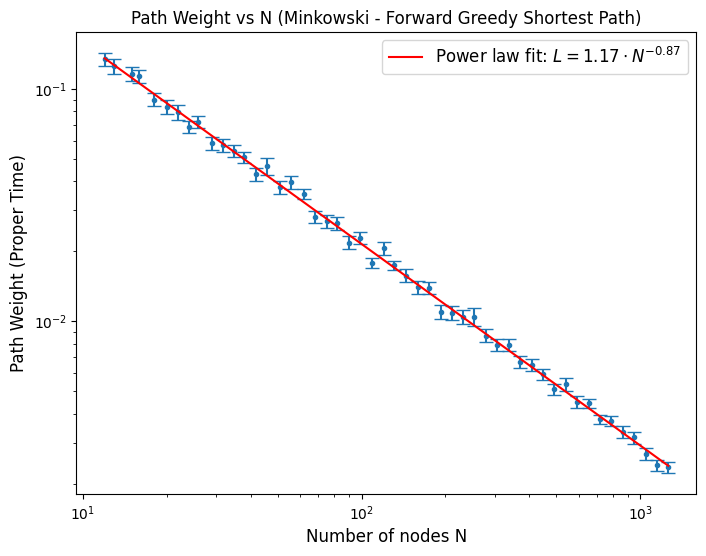

In [4]:
plot_power_law_fit(n_range, greedy_forward_path_weights, errors=greedy_forward_path_weights_std,
    title='Path Weight vs N (Minkowski - Forward Greedy Shortest Path)',
    x_label="Number of nodes N",
    y_label="Path Weight (Proper Time)",
    savefig='/greedy/path_weight_forward.svg')

Fitted power: -0.8694 +- 0.0057
Fitted coefficient:  1.1561 +- 0.0333


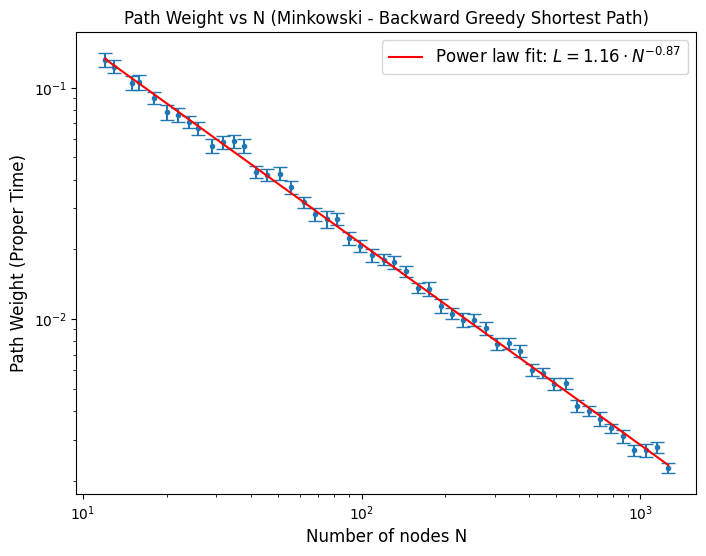

In [5]:
plot_power_law_fit(n_range, greedy_backward_path_weights, errors= greedy_backward_path_weights_std,
    title='Path Weight vs N (Minkowski - Backward Greedy Shortest Path)',
    x_label="Number of nodes N",
    y_label="Path Weight (Proper Time)",
    savefig='/greedy/path_weight_backward.svg')

Fitted power:  0.2461 +- 0.0046
Fitted coefficient:  3.1490 +- 0.0728


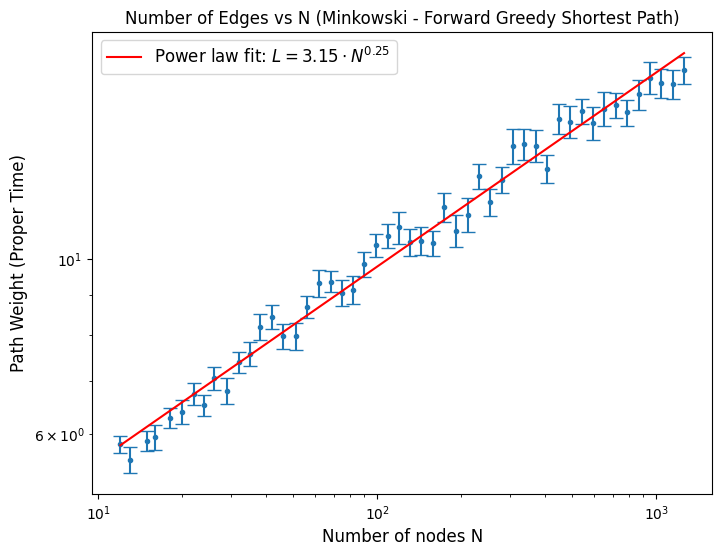

In [6]:
plot_power_law_fit(n_range, greedy_forward_num_edges, errors=greedy_forward_num_edges_std,
    title='Number of Edges vs N (Minkowski - Forward Greedy Shortest Path)',
    x_label="Number of nodes N",
    y_label="Path Weight (Proper Time)",
    savefig='/greedy/number_of_edges_forward.svg')

Fitted power: -1.1145 +- 0.0067
Fitted coefficient:  0.3727 +- 0.0126


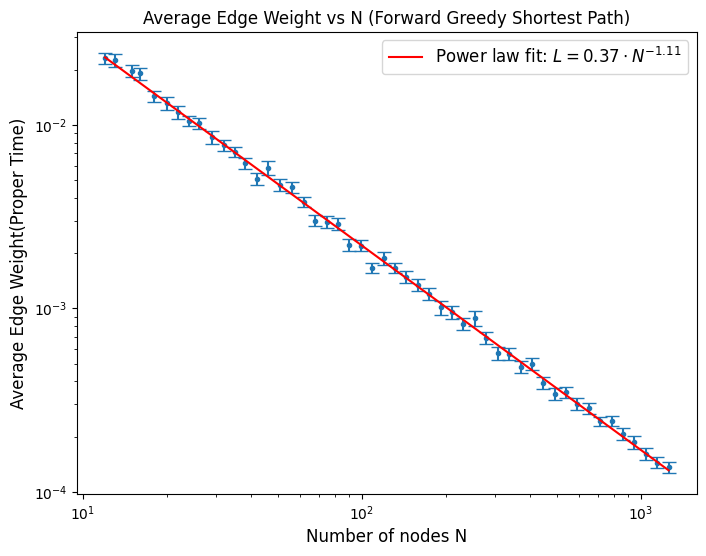

In [7]:
plot_power_law_fit(n_range, greedy_forward_avg_weight, errors=greedy_forward_avg_weight_std,
    title='Average Edge Weight vs N (Forward Greedy Shortest Path)',
    x_label="Number of nodes N",
    y_label="Average Edge Weight(Proper Time)",
    savefig='/greedy/avg_edge_weight_forward.svg')

Fitted power:  0.2451 +- 0.0055
Fitted coefficient:  3.1669 +- 0.0867


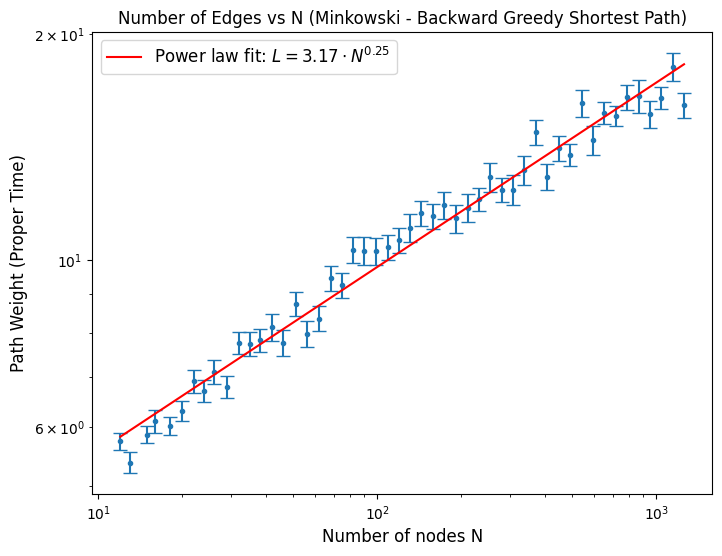

In [8]:
plot_power_law_fit(n_range, greedy_backward_num_edges, errors=greedy_backward_num_edges_std,
    title='Number of Edges vs N (Minkowski - Backward Greedy Shortest Path)',
    x_label="Number of nodes N",
    y_label="Path Weight (Proper Time)",
    savefig='/greedy/number_of_edges_backward.svg')

Fitted power: -1.1145 +- 0.0058
Fitted coefficient:  0.3650 +- 0.0107


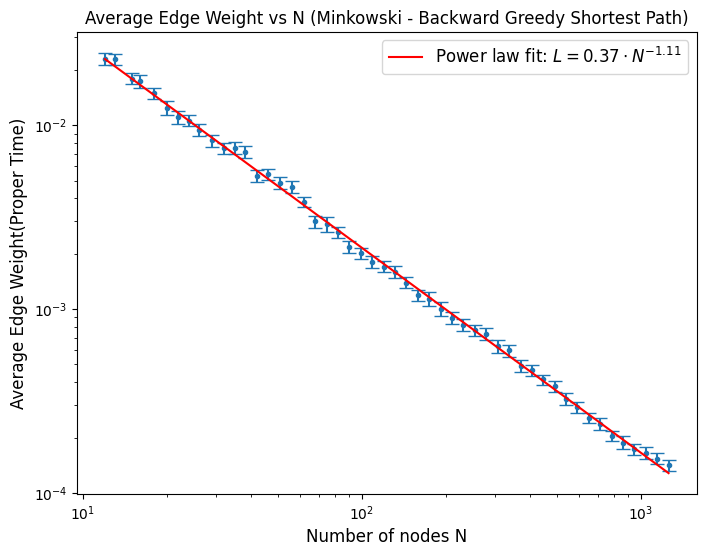

In [9]:
plot_power_law_fit(n_range, greedy_backward_avg_weight, errors=greedy_backward_avg_weight_std,
    title='Average Edge Weight vs N (Minkowski - Backward Greedy Shortest Path)',
    x_label="Number of nodes N",
    y_label="Average Edge Weight(Proper Time)",
    savefig='/greedy/avg_edge_weight_backward.svg')